<a href="https://colab.research.google.com/github/gabetrix/public-datasets/blob/main/trilha05_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/gabetrix/public-datasets/main/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='median_house_value'>

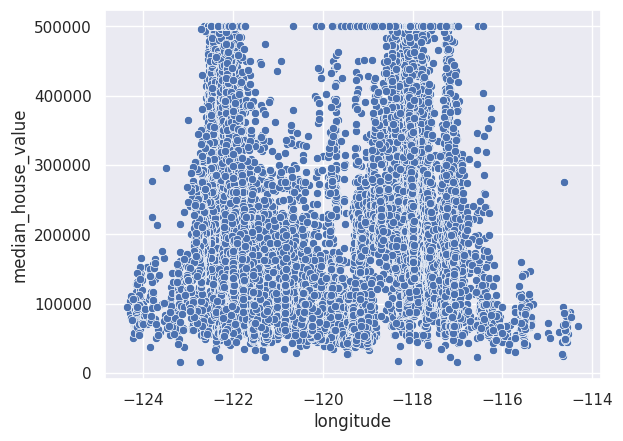

In [15]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'])

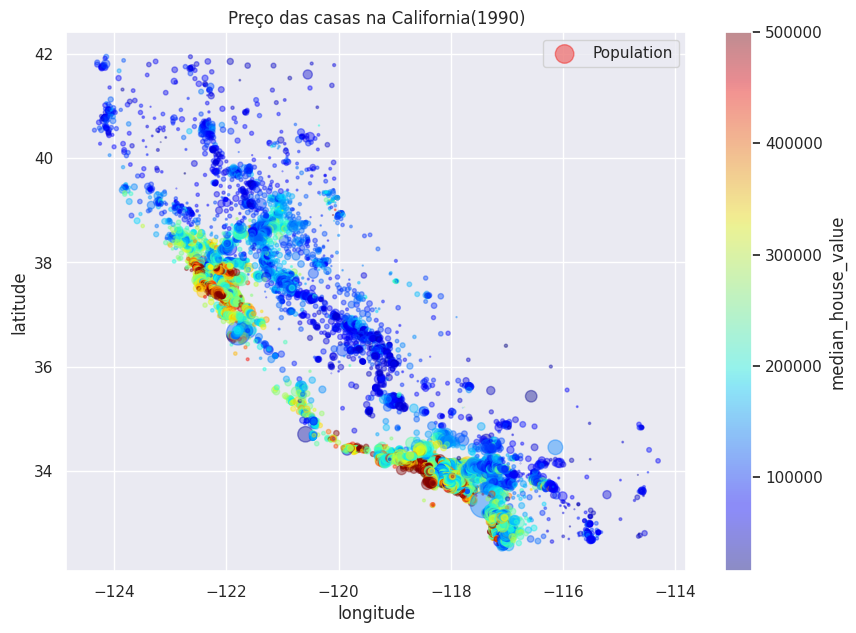

In [16]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="Population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.title('Preço das casas na California(1990)')
plt.legend()

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
X = df[['longitude']]
y = df['median_house_value']

dtrl = DecisionTreeRegressor(max_depth=2, random_state=42)

dtrl.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

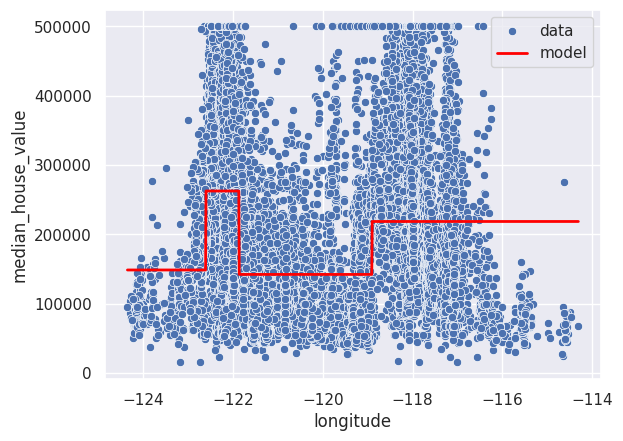

In [19]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'],
                label='data')

plt.plot(df['longitude'].sort_values(),
         dtrl.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()


In [20]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtrl, feature_names=['longitude'],
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)

In [21]:
X = df[['longitude']]
y = df['median_house_value']

dtrl = DecisionTreeRegressor(max_depth=15, random_state=42)

dtrl.fit(X,y)

DecisionTreeRegressor(max_depth=15, random_state=42)

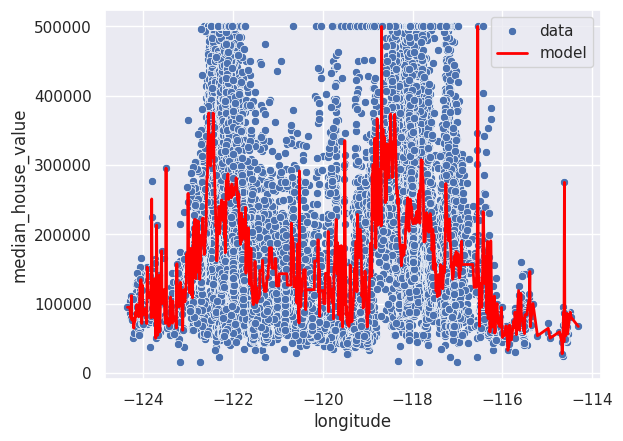

In [22]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'],
                label='data')

plt.plot(df['longitude'].sort_values(),
         dtrl.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

In [25]:
from sklearn.metrics import mean_squared_error as mse
max_depths = range(1,20)
training_error = []
for max_depth in max_depths:
  model_1 = DecisionTreeRegressor(max_depth=max_depth)
  model_1.fit(X,y)
  training_error.append(mse(y,model_1.predict(X)))

testing_error = []
for max_depth in max_depths:
  model_2 = DecisionTreeRegressor(max_depth=max_depth)
  model_2.fit(X_train, y_train)
  testing_error.append(mse(y_test, model_2.predict(X_test)))


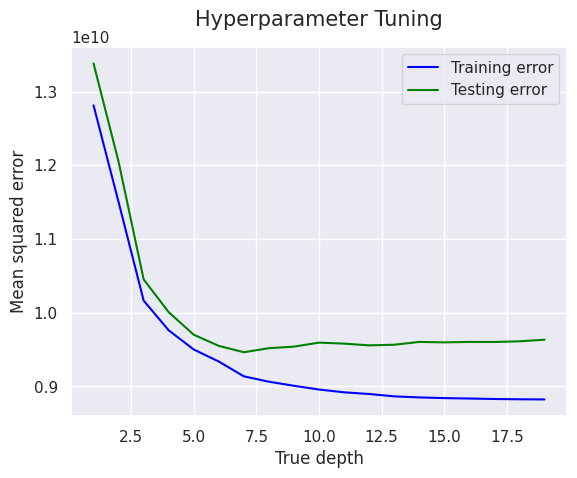

In [26]:
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('True depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [28]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid={ 'max_depth': range(1,11),
                                'min_samples_split': range(10,60,10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)
print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 50}
9363438182.696402


Text(0.5, 1.0, 'Best fitting')

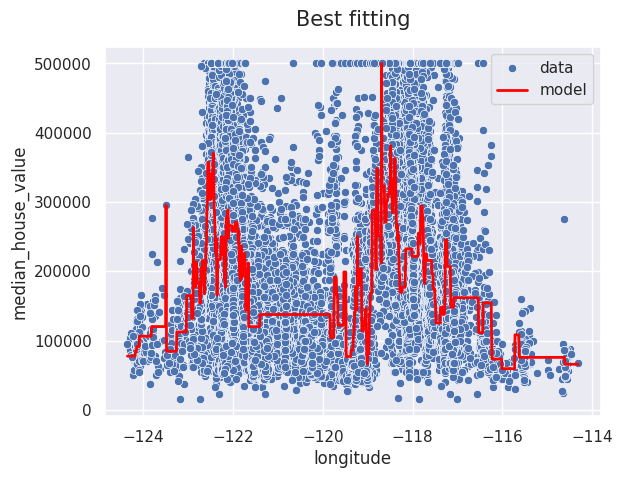

In [30]:
sns.scatterplot(x=df['longitude'],
                y=df['median_house_value'],
                label='data')


new_model = DecisionTreeRegressor(max_depth=9,
                                  min_samples_split=50)

new_model.fit(X_train,y_train)
plt.plot(df['longitude'].sort_values(),
         new_model.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)
plt.legend()
plt.title('Best fitting', pad=15, size=15)